<a href="https://colab.research.google.com/github/LachlanSharp/Lorem-ipsum/blob/main/A3_Deliverable_2_Lachlan_Sharp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MA5851 - Assessment 3: WebCrawler and NLP System

---

* **Task 2**: WebCrawler
* **Author**: Lachlan Sharp
* **Due Date**: 2021-12-08

The following was the second deliverable for the WebCrawler and NLP System, outlining the WebCralwer component.

* *Note*: due to issues encountered rendering the notebook to a PDF files, images have been included twice: one to support the PDF render, and the other to support notebook (.ipynb) and HTML.

Artefacts of this project were published on GitHub: https://github.com/LachlanSharp/Lorem-ipsum.git 

---



## Target site for Web Crawling


Data for the project was scraped from the “Horse Health” forum, accessible via the following URL: https://www.horseforum.com/forums/horse-health.17/. 

The forum was started by horse enthusiasts in the United States, and has grown to over 81,000 members with 3.2 million posts (refer www.horseforum.com/about/). As of December 2021, the “Horse Health” forum reports over 318,000 posts and 87.4 million views. From the forum’s description:

> “Discuss all aspects of horse health including horse injury and lameness, horse medications, parasites, horse diseases and more.”— www.horseforum.com/forums/horse-health.17/ 


## Rationale for target choice

The *Horse Health* forum was selected for the following reasons:

* **Relevant content**: the forum deals directly with horse health issues (and not the perception of horse welfare).
* **Volume of data**: the forum contains tens of thousands of conversation “threads” and millions of posts.
* **No authentication**: the website is publicly accessible for the purpose of reading content.
* **Static HTML content**: the website’s pages are “static” HTML (i.e., not dynamically generated content via JavaScript). This allowed for scraping of content via Python library, `BeautifulSoup`.
* **User reactions**: For the benefit of sentiment analysis, the forum allows users to “react” (e.g., “Like”) other user’s posts.
* **Extensibility**: There were more than fifty other forums besides *Horse Health* at www.horseforum.com, plus there are many more forum-type sites at other domains. Hence development of the WebCrawler would allow access to much other data.


## Complexity of content


The complexity of the website was relatively straight forward, as characterised by the following aspects:

* Conceptual hierarchy of information.
* Logical page design.

\  

**Conceptual hierarchy of information**

Good conceptual design to the website allowed for good conceptual design of the WebCrawler. In lieu of an entity relationship diagram, the concepts for the website were as follows:

* The ***domain*** (www.horseforum.com) has many ***forums***, and each ***forum*** belongs to that single ***domain***.
* A ***forum*** (i.e., *Horse Health*, https://www.horseforum.com/forums/horse-health.17/) contains many conversation ***threads***, and each ***thread*** belongs to a single ***forum***.
* A ***thread*** consists of multiple ***posts*** (i.e., messages), and each ***post*** belongs to a single ***thread***.
* A ***forum*** has multiple ***forum-pages***, and each ***forum-page*** contains multiple ***threads*** belonging to the ***forum***.
* A ***thread*** has multiple ***thread-pages***, and each ***thread-page*** contains multiple ***posts*** belonging to the ***thread***.
* A ***thread*** is created by a single ***user***, starting with an initial ***post***.
* A reply ***post*** can be made by any ***user*** (including the originator).
* Multiple ***users*** can ***react*** (e.g., “Like”) a ***post*** but not all ***posts*** have a ***reaction***.

\  

***Logical page design***

In the opinion of this project, the website had a consistent and logical design. This made the repetitive tasks of the WebCrawler straight forward. Additionally, elements within web pages were also consistently and thoroughly identified (via class or attribute). That made identification of the required elements using `BeautifulSoup` easy, typically requiring no more than two levels of searching to home in on the required element.


## Fair use of data


The terms of use for the website (https://www.horseforum.com/help/terms/) did not explicitly forbade or even reference web scraping. In section *Disclaimer and Limitation of Liability* (para. 5) it states: “The Web Site is provided for informational purposes only, and is not intended for trading or investing purposes, or for commercial use.”. Also pertinent from the terms of use was section *Limited Licence* which grants a limited licence to use information from the site free of charge for “non-commercial, personal, or educational purposes only”.

As this project was also for academic purposes, no conflict (i.e., copyright) was perceived to be created in Web Crawling the site. Additionally, the only “personal” information that was intentionally scraped were pseudonymous usernames, hence there were no perceived issues of privacy or confidential information. Users on the forum have ability to “lock” posts to specific users, and hence keep them away from general view.

As an attempted courtesy, and as enabled by the difference in time zone between the United States and Australia, the site was only crawled outside of US business hours. This was done in an attempt to minimise impact on accessibility of the site to other users.


## Metadata supplementation and rationale

The *Horse Health* forum was not the first website to be crawled by this project, that instead being site https://www.tophorse.com.au/horses-for-sale/. “TopHorse Sales” is a much smaller site, listing less than 200 horses for sale. 

The rationale in scraping *TopHorse Sales* was to investigate whether any topics of health modelled from the Horse Health forum could be identified in the purchasing of a new horse. However, the *TopHorse Sales* data was never incorporated in the NLP system developed, even though the dataset was provided by this project. Ultimately that site just provided an easier development opportunity for the WebCrawler.


## Content extraction

The WebCrawler was implemented in Python using the `BeautifulSoup` library. It was given a website forum URL as its starting page, then proceeded in two passes:

* First, it crawled the forum pages to extract details of each conversation thread.
* Secondly, for each thread, it crawled all pages of the thread to retrieve all posts.

This data was then saved to file (.csv) as source data for the NLP system.

Best effort was made to make the WebCrawler as generic as possible. While the identification of elements extracted were specific to the design of the Horse Health forum pages, the framework for crawling was abstracted.

The core WebCrawler was coded in user defined function (UDF) `web_crawler()` (refer Appendix – ‘UDF WebCrawler’). The function accepted the following parameters:

* `url_domain`: the base URL domain (including protocol) to be crawled (e.g., https://www.horseforum.com)
* `url_path`: The URL path for the first page to be crawled (e.g., /forums/horse-health.17/)
* `fx_get_ResultSet`: A UDF that returns a collection of repeating elements within the page (i.e., threads on the forum, or posts in a thread, etc.).
* `fx_get_ResultSet_data`: A UDF that returns scraped data from the ResultSet (i.e., scrapes data for a single post etc.).
* `fx_get_next_page_url`: a UDF that returns the URL for the next page (of the forum or thread).
* `fx_get_page_data`: An optional UDF that can be used to scrape data specific to a page (as opposed to the collection of items being scraped within the page).
* `max_pages`: An optional limit to the maximum number of pages to iterate (handy for when testing code)
* `echo_every_n`: controls the frequency of output updates from the crawler.
* `wait_page_sec`: An optional duration to wait between requesting pages being crawled.

This function was used of itself to perform the “first pass” across the forum-pages to extract URL paths for its threads. This was illustrated in Figure 1, where elements on the forum page are identified against the data extracted. Implementation was reasonably concise, as included in the Appendix (section ‘Crawl horseforum – health’).

However, the “second pass” required iterating through all the threads, and in turn all their posts. This necessitated need for a “wrapper” function around `web_crawler()`. That function was eponymously named `wrapper_web_crawler()` (refer Appendix, section ‘UDF crawler wrapper’). Inputs to the wrapper were similar to the crawler, though instead of accepting a single URL path as a parameter it would accept a list of them. It also had additional parameters to control program output and wait times between cycles.

Figure 2 illustrated the elements on a thread’s page that were extracted and how they were mapped to features within the “thread-pages” dataset. Similarly, Figure 3 showed a similar mapping for a thread’s post to the “thread-posts” dataset.

The only additional complexity was extracting the number of reactions for a post (refer Figure 3). While the example included was simple, only the first few usernames that reacted would be explicitly shown against the post. To view the full list of users that reacted, a further URL path needed to be followed. This additional “pass” was accommodated within the `wrapper_web_crawler()` function by passing the parameter `get_ResultSet_data` as a lambda function as follows: 

```
lambda post: scrape_thread_post_details_horseforum(page_posts=post, url_domain=url_domain)
```

This allowed the WebCrawler to “step down” an additional level for each post, without having to wrap a further loop of iteration within the wrapper or the core WebCrawler function.


---

#### Figure 1: Horse-health forum

![Fig. 1: Horse Health forum](horse-health_forum.png)

In [ ]:
%%html
<img src='https://drive.google.com/uc?export=view&id=1q3sYfrqNVupckg_4xx5yxCyuTCF0ZJhg' alt="horse-health forum" width="1200"/>

| id | Feature                       | Example value                                     |
|:--:|-------------------------------|---------------------------------------------------|
|  A | item_title                    | poisonous plants from HF member locations         |
|  A | item_url_path                 | /threads/poisonous-plants-from-hf-member-locat... |
|  B | item_created_date             | 2018-01-01T22:03:05-0500                          |
|  C | item_created_by               | Smilie                                            |
|  C | item_created_by_url_path      | /members/smilie.18361/                            |
|  D | item_view_count               | 2151                                              |
|  E | item_reply_count              | 5                                                 |
|  F | item_last_replied_date        | 2020-12-08T16:29:12-0500                          |
|  G | item_last_replied_by          | stevenson                                         |
|  G | item_last_replied_by_url_path | /members/stevenson.26572/                         |

---

#### Figure 2: Forum thread's page

![Fig. 2: Thread's pages](thread_page.png)

In [ ]:
%%html
<img src='https://drive.google.com/uc?export=view&id=1Xv6BflRx8DvbezYCUTqPmUhMm5Nb9-E3' alt="Thread's pages" width="1200"/>

| thread_url_path                                 | participant_count [A] | page_url_path [B]                                        |
|-------------------------------------------------|:-----------------:|-------------------------------------------------------|
| /threads/the-care-of-an-emaciated-horse.100412/ |         31        | /threads/the-care-of-an-emaciated-horse.100412/       |
| /threads/the-care-of-an-emaciated-horse.100412/ |         31        | /threads/the-care-of-an-emaciated-horse.100412/page-2 |
| /threads/the-care-of-an-emaciated-horse.100412/ |         31        | /threads/the-care-of-an-emaciated-horse.100412/page-3 |

---

#### Figure 3: Thread's posts

![Fig. 3: Thread's posts](thread_posts.png)

In [ ]:
%%html
<img src='https://drive.google.com/uc?export=view&id=1nel3yHA9jID36bcTv6-hju9AN7VUSB9J' alt="Thread's posts" width="1200"/>

| id |         Feature         |               Example value              |
|:--:|-------------------------|------------------------------------------|
| A  | thread_url_path         | /threads/making-a-vet-kit.251/           |
| B  | post_id                 | post-14941                               |
| B  | post_number             | 14                                       |
| -  | post_url_path           | /threads/making-a-vet-kit.251/post-14941 |
| C  | post_reactions_url_path | /posts/14941/reactions/                  |
| D  | post_reactions          | Like (2)                                 |
| E  | post_datetime           | 2007-05-16T18:45:35-0400                 |
| F  | post_username           | hanse004                                 |
| F  | post_userid             | 1071                                     |
| F  | post_user_url_path      | /members/hanse004.1071/                  |
| G  | post_text               | I just wanted to thank the creator ...   |

---

## Methodology for processing, cleaning and storing harvested data

The *Horse Health* forum contains a lot of data and scraping all that data took a long time (approximately six hours). As such it is pragmatic to perform the crawl over multiple sessions. Furthermore, the consequences of losing data during or after a session needed to be minimised. For these reasons, the methodology below was followed:

* **Be robust to failures**: the approach to extracting data was to be robust to failures, and return empty values (i.e., empty strings) if elements were unable to be found within a page. This allowed the crawler to progress without interruptions.
* **Break the web crawl into “chunks” (batches)**: As incorporated in section ‘Crawl forum’ (refer Appendix), the ` wrapper_web_crawler()` function was wrapped in an outer control loop that allowed all thread URL paths to be broken into even chunks, such that the start and end chunks for a web crawl could be nominated. In total, the web crawl for this project was accomplished over 20 “chunks” (approx. 1000 thread URL paths per chunk).
* **Save data often**: data for each chunk was written to local (.csv) files. The chunks were then later combined into complete datasets. Data scraped by the WebCrawler was returned as `pandas` data frames, for subsequent use in the NLP system.

The only other aspect of note in processing the scraped data was that emoji within posts were image tags and not Unicode characters. This was illustrated in Figure 3, with the commensurate HTML tag for that emoji included below:

```

```

By default (and design), the `BeautifulSoup` library would “loose” the emoji’s when using the `get_text()` method (as `img` tags do not have “text”). But as emoji were pertinent for sentiment analysis, the text of message posts was instead extracted via a UDF called `get_horseforum_post_text()`. This function would retain the `img` tags “title” attribute (which for the example above would be “Ooops!    :oops:”).


## Summary and visualisation of the harvested data

A summary of data scraped by the WebCralwer was provided below.

### Horse Health forum:

WebCrawling Summary:

* Approx. WebCrawl time: `6 hours`
* Number or theads crawled: `20,954`
    + Number of "chunks" used to batch the WebCrawl: `20`
    + Avg. number of thread URLs crawled per "chunk" (batch): `1047`
* Number of thread-pages crawled: `24,627`
* Number of thread-posts crawled: `232,763`
* Earliest thread scraped: `2006-11-14T23:17:30-0500`
* Latest thread scraped: `2021-11-29T11:45:42-0500`

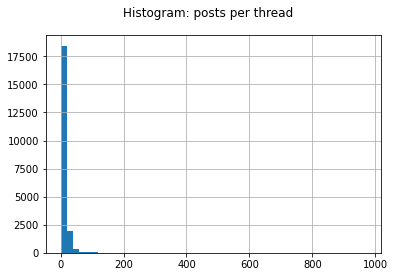

In [58]:
# Histogream: posts per thread
tmpseries = df_horseforum_threads['item_reply_count'] + 1
tmpseries.hist(bins=50)
plt.suptitle("Histogram: posts per thread")
plt.show()

Dataset sizes:

In [38]:
print("Thread items: {x[0]} rows × {x[1]} cols".format(x = df_horseforum_threads.shape))
print("Page items: {x[0]} rows × {x[1]} cols".format(x = df_horseforum_thread_pages.shape))
print("Post items: {x[0]} rows × {x[1]} cols".format(x = df_horseforum_thread_posts.shape))

Thread items: 20954 rows × 10 cols
Page items: 24627 rows × 3 cols
Post items: 232763 rows × 11 cols


In [62]:
print("Earliest thread scraped: {}".format(min(df_horseforum_threads['item_created_date'])))
print("Lastest thread scraped: {}".format(max(df_horseforum_threads['item_created_date'])))

Earliest thread scraped: 2006-11-14T23:17:30-0500
Lastest thread scraped: 2021-11-29T11:45:42-0500


In [39]:
df_horseforum_threads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20954 entries, 0 to 20953
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   item_title                     20954 non-null  object
 1   item_url_path                  20954 non-null  object
 2   item_created_date              20954 non-null  object
 3   item_created_by                20953 non-null  object
 4   item_created_by_url_path       20953 non-null  object
 5   item_view_count                20954 non-null  int64 
 6   item_reply_count               20954 non-null  int64 
 7   item_last_replied_date         20954 non-null  object
 8   item_last_replied_by           20948 non-null  object
 9   item_last_replied_by_url_path  20948 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.6+ MB


In [40]:
df_horseforum_thread_pages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24627 entries, 0 to 24626
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   thread_url_path    24627 non-null  object 
 1   participant_count  24622 non-null  float64
 2   page_url_path      24627 non-null  object 
dtypes: float64(1), object(2)
memory usage: 577.3+ KB


In [41]:
df_horseforum_thread_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232763 entries, 0 to 232762
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   thread_url_path          232763 non-null  object 
 1   post_id                  232763 non-null  object 
 2   post_number              232763 non-null  float64
 3   post_url_path            232763 non-null  object 
 4   post_reactions_url_path  45707 non-null   object 
 5   post_reactions           45707 non-null   object 
 6   post_datetime            232763 non-null  object 
 7   post_username            232760 non-null  object 
 8   post_userid              232760 non-null  float64
 9   post_user_url_path       232760 non-null  object 
 10  post_text                232750 non-null  object 
dtypes: float64(2), object(9)
memory usage: 19.5+ MB


### TopHorse Sales

**Listings**

In [23]:
df_tophorse_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   item_title         165 non-null    object
 1   item_url_path      165 non-null    object
 2   item_created_date  165 non-null    object
 3   item_img_url_path  165 non-null    object
dtypes: object(4)
memory usage: 5.3+ KB


In [24]:
df_tophorse_items.head()

,item_title,item_url_path,item_created_date,item_img_url_path
0,Treasure perfect kids pony club pony,/horses-for-sale/first-and-second-pony/Treasur...,06/12/2021,/images/ResizedImages/6-12-21-884293Image1_w22...
1,Vee Rock (Dwayne),/horses-for-sale/endurance-and-trail/Vee-Rock-...,30/11/2021,/images/ResizedImages/30-11-21-488434Image1_w2...
2,Tory,/horses-for-sale/ponies/Tory__27-11-21-563432,27/11/2021,/images/ResizedImages/27-11-21-586832Image1_w2...
3,Johnny,/horses-for-sale/australian-stock-horse/Johnny...,27/11/2021,/images/ResizedImages/27-11-21-562895Image1_w2...
4,Wanted - Riding Pony Mare,/horses-for-sale/broodmare/Wanted---Riding-Pon...,26/11/2021,/images/ResizedImages/24-11-21-231789Image1_w2...


**Listing-deails**

In [25]:
df_tophorse_item_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url_path             165 non-null    object
 1   Description          165 non-null    object
 2   index                165 non-null    object
 3   Height               165 non-null    object
 4   Age                  165 non-null    object
 5   Colour               165 non-null    object
 6   Sex                  165 non-null    object
 7   Breed                165 non-null    object
 8   Terms                165 non-null    object
 9   Location             165 non-null    object
 10  P/Trade              165 non-null    object
 11  Price                165 non-null    object
 12  Ad Code              165 non-null    object
 13  image_count          165 non-null    int64 
 14  main_image_url_path  165 non-null    object
 15  video_url            165 non-null    object
 16  Seller_I

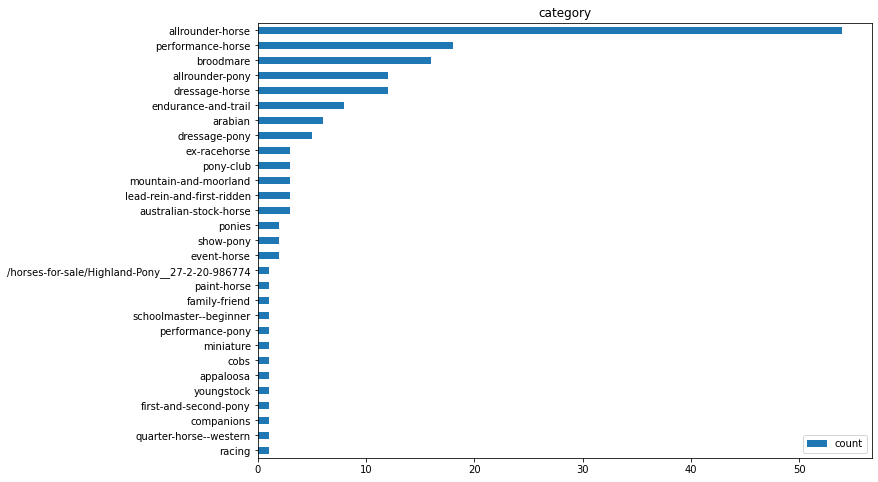

In [33]:
# Horse listings by category
# * Note: category was determined by parsing from the listing's URL
fig, ax = plt.subplots(figsize=(11, 8))
columnName = 'category'
tmp_df = df_tophorse_item_details[columnName].value_counts().to_frame('count').sort_values('count', ascending=True)
tmp_df.plot.barh(ax = ax, title = columnName)
plt.show()

---

# Appendix - Python Coding

This section includes all relevant code for the WebCralwer. This Python notebook was created using Google Colab (https://research.google.com/colaboratory/faq.html).

## Setup of data-project 

### Import Dependencies

In [52]:
import os.path # Operating system interface
from time import time, sleep # Time access and conversions
from datetime import datetime # Basic date and time types
import glob # Unix style pathname pattern expansio

import numpy as np # array/matrices support
import pandas as pd # data analaysis
import matplotlib.pyplot as plt
%matplotlib inline

import requests # HTTP library
from bs4 import BeautifulSoup # HTML/XML document parser
import html # HyperText Markup Language support

import re # regular expressions


# Get python version
import platform # Platform’s identifying data
print('\nPython version {}'.format(platform.python_version()))


Python version 3.7.12


### User defined functions (non-Crawler)


The following was for user-defined functions distinct from the WebCrawler.

In [1]:
def mk_dir(path):
    """
    Creates a directory if it doesn't exist

    Parameters:
    -----------
    str : path
        The full directory path for the folder to be created.
        Note: the path should not terminate with a '/'

    Returns:
    --------
    bool
        If folder exists, True, otherwise, False
    """
    if not os.path.exists(path):
        try:
            os.makedirs(path)
        except:
            pass
    return os.path.exists(path)

### Set directory paths

This section sets pertinent file paths and names. The expected folder structure for this assessment was documented below.

```
working-dir/
├─ data/
│  ├─ {DateTime}/                          {generated by data-project for "chunks"}
│  ├─ df_horseforum_thread_pages.csv       {generated by data-project}
│  ├─ df_horseforum_thread_posts.csv       {generated by data-project}
│  ├─ df_horseforum_threads.csv            {generated by data-project}
│  ├─ df_tophorse_item_details.csv         {generated by data-project}
│  ├─ df_tophorse_items.csv                {generated by data-project}
├─ A3_Deliverable_2_Lachlan_Sharp.ipynb    {Python Jupyter notebook}

```

#### Mount Google Drive

This section applies to use of this Python notebook within Google Colab.

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Set file paths

In [4]:
# Set directory paths root filepath for data-project
filepath_root = '/content/drive/MyDrive/Colab Notebooks/MA5851/Assessment 3' # data-project root
filepath_data = os.path.join(filepath_root, 'data') # data folder
print("Directory 'data' exists?: {}".format(mk_dir(filepath_data)))

# Set filenames
filename_tophorse_items_df = "df_tophorse_items.csv"
filename_tophorse_item_details_df = "df_tophorse_item_details.csv"

filename_horseforum_threads_df = "df_horseforum_threads.csv" 
filename_horseforum_thread_posts_df = "df_horseforum_thread_posts.csv"
filename_horseforum_thread_pages_df = "df_horseforum_thread_pages.csv"

Directory 'data' exists?: True


## WebCrawler

The following section performs a web crawl across to seperate sites:

* *TopHorse Sales*: https://www.tophorse.com.au/horses-for-sale/
* *Horse Health*: https://www.horseforum.com/forums/horse-health.17/

#### UDF WebCrawler

Core WebCrawler function: finds "repeating" elements on the specified page, and returns the details of those elements.

In [16]:
def web_crawler(
    url_domain
    ,url_path
    ,fx_get_ResultSet
    ,fx_get_ResultSet_data
    ,fx_get_next_page_url    
    ,fx_get_page_data = None
    ,max_pages = None
    ,echo_every_n = 1
    ,wait_page_sec = 0
    ):
    """
    Generic web crawler

    Parameters:
    -----------
    str : url_domain
        The base URL domain (including protocol) to be crawled (e.g., https://www.tophorse.com.au)
    str : url_path
        The URL path for the first page to be crawled (e.g. /horses-for-sale/)
        Note that the full URL is formed via concatenation with url_domain, hence
        care should be taken to provide the correct prefixing & suffixing '/'
    function : fx_get_ResultSet
        A function to return a BeautifulSoup ResultSet object; 
        this will be  a collection of items (i.e., tags) within the page being crawled.
    function : fx_get_ResultSet_data
        A function that returns scraped data from a ResultSet, as a list;
        this will be data from the collection of items (i.e., tags) returned by `fx_get_ResultSet()`.
    function : fx_get_next_page_url
        A function that returns the "next" page's url path as a string; 
        this will be specific for the page being crawled.
    function : fx_get_page_data
        An optional function that returns scraped data from the page being crawled, as a dictionary;
        this will be data of the page itself, as opposed to data from the collection of items within
        the page returned by `fx_get_ResultSet_data()`.        
    int : max_pages
        The maximum number of pages to iterate (handy for when testing code)
    int : echo_every_n
        prints output every n iterations, where n = echo_every_n.
    int : wait_page_sec
        Duration in seconds to wait between requesting pages
    """
    # Initialise
    if max_pages is None:
        max_pages = float('inf') 
    data_pages = [] 
    data_items = []
    count_page = 1

    # Crawl through pages until `url_path` is an empty string.
    while (url_path != "") and (count_page <= max_pages):
        response = requests.get(url_domain + url_path)

        # Echo progress
        if (echo_every_n > 0) and (count_page % echo_every_n == 0): # lazy evaluation
            print('Page {}, HTTP response status: {}'.format(count_page, response.status_code))

        if response.status_code == 200:
            # Scrape page

            soup = BeautifulSoup(response.text, 'html.parser')
 
            # Get data of the page itself (optional)
            if fx_get_page_data is not None:
                page_data = fx_get_page_data(soup)
                page_data['page_url_path'] = url_path # Add key
                # Append results
                data_pages.extend([page_data])

            # Get data from a collection of items within the page
            tags = fx_get_ResultSet(soup)
            item_data = fx_get_ResultSet_data(tags)

            # Append results
            data_items.extend(item_data)
            if (echo_every_n > 0) and (count_page % echo_every_n == 0): # lazy evaluation
                print("\t{} items...".format(len(item_data)))

            # Get next page url
            url_path = fx_get_next_page_url(soup)
            #print(url_path)
        else:
            # force condition to exit loop
            url_path = ""

        count_page += 1
        sleep(wait_page_sec)
    
    return data_items, data_pages

#### UDF WebCrawler Wrapper

A "wrapper" function for the WebCrawler function: given a list of URL paths it iterates across each, returning the data from the "repeating" elements specifc to each URL path.

In [ ]:
def wrapper_web_crawler(
    url_domain
    ,list_url_path
    ,fx_get_ResultSet
    ,fx_get_ResultSet_data
    ,fx_get_next_page_url
    ,fx_get_page_data = None
    ,max_pages = None
    ,echo_every_n = 1
    ,echo_page_crawl_every_n = 0
    ,wait_thread_sec = 0
    ,wait_page_sec = 0
):

    # Initialise
    count_max = len(list_url_path)
    df_forum_thread_posts = pd.DataFrame()
    df_forum_thread_pages = pd.DataFrame()

    # Crawl threads and scrape
    start_time = time()
    print('Crawl start UTC: {}'.format(datetime.fromtimestamp(start_time)))
    for count, thread_url_path in enumerate(list_url_path):
        # Show progress
        if (echo_every_n > 0) and (count % echo_every_n == 0): # lazy evaluation
            print("item {} of {}:".format(count + 1, count_max))
            print("\t{}".format(thread_url_path))

        # Crawl pages and scrape
        data_thread_posts, data_thread_pages = web_crawler(
            url_domain =  url_domain
            ,url_path = thread_url_path
            ,fx_get_ResultSet = fx_get_ResultSet
            ,fx_get_ResultSet_data = fx_get_ResultSet_data
            ,fx_get_next_page_url = fx_get_next_page_url
            ,fx_get_page_data = fx_get_page_data 
            ,max_pages = max_pages
            ,echo_every_n = echo_page_crawl_every_n
            ,wait_page_sec = wait_page_sec
        )

        # Convert thread's data to dataframe
        df_thread_posts = pd.DataFrame(data_thread_posts)
        df_thread_pages = pd.DataFrame(data_thread_pages)

        # Add thread's url_path as unique key    
        df_thread_posts.insert(0, 'thread_url_path', thread_url_path)
        df_thread_pages.insert(0, 'thread_url_path', thread_url_path)

        # Append to forum's dataframe
        df_forum_thread_posts = pd.concat([df_forum_thread_posts, df_thread_posts])
        df_forum_thread_pages = pd.concat([df_forum_thread_pages, df_thread_pages])

        # Wait until crawling next thread
        sleep(wait_thread_sec)

    # Reset forum dataframe's index
    df_forum_thread_posts.reset_index(inplace=True, drop=True)
    df_forum_thread_pages.reset_index(inplace=True, drop=True)

    end_time = time()
    print("---crawl complete---")
    print()
    print("Posts scraped: {}".format(len(df_forum_thread_posts.index))) 
    print("Crawl time (sec): {0}".format(end_time - start_time))
    print('Crawl end UTC: {}'.format(datetime.fromtimestamp(end_time))) 

    return [df_forum_thread_posts, df_forum_thread_pages]

### TopHorse Sales

This section was for the scraping of the *TopHorse Sales* website. 

* *TopHorse Sales*: https://www.tophorse.com.au/horses-for-sale/

It proved an informative step in the process of subsequently scraping the *Horse Health* forum (refer later section).

#### UDF: TopHorse Sales

The following UDF are specific to scraping the *TopHorse Sales* website.

In [17]:
def get_next_page_url_tophorse(tophorse_soup):
    """
    Gets the 'next page' url path from the www.tophorse.com.au main page.

    Parameters:
    -----------
    bs4.BeautifulSoup : tophorse_soup
        A BeautifulSoup object for the web page.

    Returns:
    --------
    str
        the relative url path for the 'next page' if successful, otherwise an empty string.
    """
    soup = tophorse_soup
    url_path = ""
    try:
        url_path = soup.find(
            'div'
            ,id = 'catalogueMidCol'
            ).find(
                'a'
                ,class_='redLink'
                ,string=re.compile("^Next")
                )['href']
    except:
        pass

    return url_path



def get_listings_tophorse(tophorse_soup):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : tophorse_soup
        A BeautifulSoup object for the web page.

    Returns:
    --------
    bs4.element.ResultSet
        An iterable collection of advert listings, as returned by BeautifulSoup
    """
    soup = tophorse_soup
    return soup.find_all('div', class_='listAdvert hd')




def scrape_listing_details_tophorse(advert_listings):
    """
    Iterates a bs4 ResultSet of horse advert (i.e., www.tophorse.com.au) listings 
    to get predefined values.

    Parameters:
    -----------
    bs4.element.ResultSet : advert_listings
        An iterable collection of advert listings, as returned by BeautifulSoup


    Returns:
    --------
    list of dict {str, Any}
        the predefined details of each advert
            + item_title
            + item_url_path
            + item_created_date
            + item_img_url_path
    """
    listings = advert_listings
    data_items=[]
    if listings is not None:
        for item in listings:
            # initialise
            item_title = ""
            item_url_path = ""
            item_created_date = ""
            item_img_url_path = ""

            # Get items's listing title and url path
            try:
                tag1 = item.find('h2', class_='listAdvertTitle')
                tag_url = tag1.find('a')
                item_title = tag_url.get_text()
                item_url_path = tag_url['href']
            except:
                pass

            # Get items's image
            try:
                item_img_url_path = item.find('div', class_='advertImage').find('a').img['src']
            except:
                pass

            # Get items's created date
            try:
                item_created_date = tag1.find('span').get_text()
            except:
                pass

            # Save result
            dict_item = {
                'item_title' : item_title
                ,'item_url_path' : item_url_path
                ,'item_created_date' : item_created_date
                ,'item_img_url_path' : item_img_url_path
                }
            data_items.append(dict_item.copy())

    return data_items

#### Crawl 1: TopHorse Sales listings

This section performed the WebCrawl on the main page of the *TopHorse Sales* site, to extract all individual horse listings (i.e., adverts).

In [18]:
# Specify which web page should be crawled
url_domain =  "https://www.tophorse.com.au"
url_path = "/horses-for-sale/" # note terminating '/'

# Set functions relevant to scraping the web page
get_ResultSet = get_listings_tophorse
get_ResultSet_data = scrape_listing_details_tophorse
get_next_page_url = get_next_page_url_tophorse

# Crawl pages and scrape
start_time = time()
print('Crawl start UTC: {}'.format(datetime.fromtimestamp(start_time)))
data_tophorse_items, _ = web_crawler(
    url_domain =  url_domain
    ,url_path = url_path
    ,fx_get_ResultSet = get_ResultSet
    ,fx_get_ResultSet_data = get_ResultSet_data
    ,fx_get_next_page_url = get_next_page_url 
    ,echo_every_n = 1   
)
end_time = time()
print("---crawl complete---")
print()
print("Listings count: {}".format(len(data_tophorse_items)))
print("Crawl time (sec): {0}".format(end_time - start_time))
print('Crawl end UTC: {}'.format(datetime.fromtimestamp(end_time)))

Crawl start UTC: 2021-12-06 23:20:48.985931
Page 1, HTTP response status: 200
	15 items...
Page 2, HTTP response status: 200
	15 items...
Page 3, HTTP response status: 200
	15 items...
Page 4, HTTP response status: 200
	14 items...
Page 5, HTTP response status: 200
	12 items...
Page 6, HTTP response status: 200
	15 items...
Page 7, HTTP response status: 200
	13 items...
Page 8, HTTP response status: 200
	14 items...
Page 9, HTTP response status: 200
	13 items...
Page 10, HTTP response status: 200
	14 items...
Page 11, HTTP response status: 200
	15 items...
Page 12, HTTP response status: 200
	10 items...
Page 13, HTTP response status: 200
	0 items...
---crawl complete---

Listings count: 165
Crawl time (sec): 11.630311489105225
Crawl end UTC: 2021-12-06 23:21:00.616242


In [22]:
# Convert to data frame and save result locally
df_tophorse_items = pd.DataFrame(data_tophorse_items)

# Save dataframe locally
df_tophorse_items.to_csv(os.path.join(filepath_data, filename_tophorse_items_df), index=False)

df_tophorse_items

,item_title,item_url_path,item_created_date,item_img_url_path
0,Treasure perfect kids pony club pony,/horses-for-sale/first-and-second-pony/Treasur...,06/12/2021,/images/ResizedImages/6-12-21-884293Image1_w22...
1,Vee Rock (Dwayne),/horses-for-sale/endurance-and-trail/Vee-Rock-...,30/11/2021,/images/ResizedImages/30-11-21-488434Image1_w2...
2,Tory,/horses-for-sale/ponies/Tory__27-11-21-563432,27/11/2021,/images/ResizedImages/27-11-21-586832Image1_w2...
3,Johnny,/horses-for-sale/australian-stock-horse/Johnny...,27/11/2021,/images/ResizedImages/27-11-21-562895Image1_w2...
4,Wanted - Riding Pony Mare,/horses-for-sale/broodmare/Wanted---Riding-Pon...,26/11/2021,/images/ResizedImages/24-11-21-231789Image1_w2...
...,...,...,...,...
160,Heritage ASH Broodmare,/horses-for-sale/broodmare/Heritage-ASH-Broodm...,31/12/2019,/images/ResizedImages/31-12-19-458752Image2_w2...
161,Chestnut Gelding,/horses-for-sale/allrounder-horse/Chestnut-Gel...,25/12/2019,/images/ResizedImages/25-12-19-316222Image1_w2...
162,Beautiful patient first horse,/horses-for-sale/allrounder-horse/Beautiful-pa...,19/12/2019,/images/ResizedImages/19-12-19-156723Image1_w2...
163,registered overo paint gelding,/horses-for-sale/paint-horse/registered-overo-...,19/12/2019,/images/ResizedImages/19-12-19-626437Image7_w2...


##### Reload listing data

This section was to reload saved data from a previous WebCrawling sesession.

In [13]:
# Reload tophorse listings
df_tophorse_items = pd.read_csv(os.path.join(filepath_data, filename_tophorse_items_df))
df_tophorse_items.shape

(170, 4)

#### Crawl 2: TopHorse Sales listing details

Having extracted the URLs for each horse listing, the following loops through to scrape each one.

* *Note*: This was implemented prior to the creation of the UDF `wrapper_web_crawler()` lare used on the *Horse Health* forum.

In [20]:
# Crawl pages and scrape
start_time = time()
print('Crawl start UTC: {}'.format(datetime.fromtimestamp(start_time)))

df_item_details = pd.DataFrame()
count_max = df_tophorse_items.shape[0]
echo_every_n = 10
for count, url_path in enumerate(df_tophorse_items['item_url_path']):
    # Requeste advert details
    url_item = url_domain + url_path
    status_code = 0
    try:
        response = requests.get(url_item)
        status_code = response.status_code
        soup = BeautifulSoup(response.text, 'html.parser')
    except requests.exceptions.ConnectionError:
        # Target machine actively refused connection
        status_code = "connection refused"
    except:
        pass

    # Show progress
    if (echo_every_n > 0) and (count % echo_every_n == 0): # lazy evaluation
        print("item {} of {}:".format(count + 1, count_max))
        print("\t{}".format(url_item))
        print('\tHTTP response status: {}'.format(status_code))

    df_item = pd.DataFrame({ 'url_path':  [url_path] })

    if status_code == 200:
        # Initialsie
        item_description, main_image_url_path, video_url, Seller_Id = "", "", "", ""
        df_table_details = pd.DataFrame()
        image_count = 0
        parents = [ '', '']
        grand_parents = [ '', '', '', '']
        great_grand_parents = [ '', '', '', '']     

        try: # Item description
            item_description = soup.find('div', class_='itemDescription').get_text()
        except:
            pass

        try: # Details table
            table_details = soup.find('table', class_='productPageItemDetails')
            df_table_details = pd.read_html(table_details.prettify())[0]
            df_table_details.rename(columns={0: 'key', 1: 'value'}, inplace=True)
            df_table_details = df_table_details.iloc[:df_table_details[df_table_details['key'].str.contains('(?i)^contact', regex= True)].index[0], ]
            df_table_details['key'] = df_table_details['key'].str.replace(':','')
            df_table_details.set_index('key', inplace=True)
            df_table_details = df_table_details.transpose()
            df_table_details.reset_index(inplace=True)
            df_table_details            
        except:
            pass

        try: # Breeding Tree
            table_breeding_tree = soup.find('table', class_='breedingTree')
            df_table_breeding_tree = pd.read_html(table_breeding_tree.prettify())[0]
            df_table_breeding_tree.rename(columns={0: 'parents', 1: 'grand_parents', 2: 'great_grand_parents'}, inplace=True)
            df_table_breeding_tree.fillna('', inplace=True)
            parents = df_table_breeding_tree[df_table_breeding_tree.index % 4 == 0]['parents'].tolist()
            grand_parents = df_table_breeding_tree[df_table_breeding_tree.index % 2 == 0]['grand_parents'].tolist()
            great_grand_parents = df_table_breeding_tree['great_grand_parents'].tolist()
        except:
            pass

        try: # Number of images
            image_count = len(soup.find('div', class_='contentBlock').find_all('img'))
        except:
            pass

        try: # Main image url_path
            main_image_url_path = soup.find('div', class_='mainImage').find('img')['src']
        except:
            pass

        try: # Video url
            video_url = soup.find('div', id='videoContent').find('iframe')['src']
        except:
            pass

        try: # Seller Id
            Seller_Id = soup.find('div', class_='productPageRightCol').find('a', id=re.compile(r'SellersOtherAdverts$'))['href']
            Seller_Id = re.findall(r'[^/]+$', Seller_Id)[0]
        except:
            pass

        # Set item results
        df_item = pd.DataFrame({ 'url_path':  [url_path] })
        df_item['Description'] = item_description
        df_item = pd.concat([df_item.reset_index(drop=True), df_table_details], axis=1)
        df_item['image_count'] = image_count
        df_item['main_image_url_path'] = main_image_url_path
        df_item['video_url'] = video_url
        df_item['Seller_Id'] = Seller_Id
        df_item['parents'] = ";".join(parents)
        df_item['grand_parents'] = ";".join(grand_parents)
        df_item['great_grand_parents'] = ";".join(great_grand_parents)

    df_item_details = pd.concat([df_item_details, df_item])

df_item_details.reset_index(inplace=True)
df_tophorse_item_details = df_item_details.drop(df_item_details.columns[0], axis=1).copy()

# A horses category on the sight is hard-coded into its URL path e.g., 
#    https://www.tophorse.com.au/horses-for-sale/ --> `performance-horse` <-- /Super-quiet-educated-gelding-__9-1-20-596629
df_tophorse_item_details['category'] = df_tophorse_item_details['url_path'].replace({ r'/horses-for-sale/([^/]+)/.*' : r'\1' }, regex = True, inplace=False)
del df_item_details

end_time = time()
print("---crawl complete---")
print()
print("Listings count: {}".format(len(df_tophorse_item_details.index)))
print("Crawl time (sec): {0}".format(end_time - start_time))
print('Crawl end UTC: {}'.format(datetime.fromtimestamp(end_time)))

Crawl start UTC: 2021-12-06 23:22:32.450146
item 1 of 165:
	https://www.tophorse.com.au/horses-for-sale/first-and-second-pony/Treasure-perfect-kids-pony-club-pony__6-12-21-885493
	HTTP response status: 200
item 11 of 165:
	https://www.tophorse.com.au/horses-for-sale/endurance-and-trail/Tommy__18-11-21-116857
	HTTP response status: 200
item 21 of 165:
	https://www.tophorse.com.au/horses-for-sale/allrounder-horse/Looking-for-partnership-__12-11-21-791226
	HTTP response status: 200
item 31 of 165:
	https://www.tophorse.com.au/horses-for-sale/allrounder-horse/Groover__19-10-21-652758
	HTTP response status: 200
item 41 of 165:
	https://www.tophorse.com.au/horses-for-sale/performance-horse/WB-Mare__19-9-21-189538
	HTTP response status: 200
item 51 of 165:
	https://www.tophorse.com.au/horses-for-sale/allrounder-horse/Kind-TB-Gelding-__3-8-21-739851
	HTTP response status: 200
item 61 of 165:
	https://www.tophorse.com.au/horses-for-sale/performance-horse/F-rst-Love-x-Royal-Hit-Filly__15-7-21-34

In [21]:
# Save dataframe locally
df_tophorse_item_details.to_csv(os.path.join(filepath_data, filename_tophorse_item_details_df), index=False)
df_tophorse_item_details

,url_path,Description,index,Height,Age,Colour,Sex,Breed,Terms,Location,P/Trade,Price,Ad Code,image_count,main_image_url_path,video_url,Seller_Id,parents,grand_parents,great_grand_parents,category
0,/horses-for-sale/first-and-second-pony/Treasur...,\r\n PLEASE READ FULL ADD.\r Tr...,value,11.1 hh,13 yrs,White,Mare,Welsh Section B,For Sale,"Dean, Victoria",Private,$ 1234.00 ONO,6-12-21-885493,6,/images/ResizedImages/6-12-21-884293Image1_w57...,,,;,;;;,;;;,first-and-second-pony
1,/horses-for-sale/endurance-and-trail/Vee-Rock-...,"\r\n 75 starts, $136,562 Prize ...",value,16.0 hh,12 yrs,Bay,Gelding,Standardbred,For Sale,"Oaklands Junction, Victoria",Trade,$ 2500.00,30-11-21-497655,6,/images/ResizedImages/30-11-21-488434Image1_w5...,,HERO__9-6-20-752499,;,;;;,;;;,endurance-and-trail
2,/horses-for-sale/ponies/Tory__27-11-21-563432,\r\n The most sweetest pony I h...,value,11.0 hh,10 yrs,Grey,Mare,Other,For Sale,"Yamba, New South Wales",Private,$ 3500.00 ONO,27-11-21-563432,4,/images/ResizedImages/27-11-21-586832Image1_w5...,https://www.youtube.com/embed/lUedBJKyWAk,,;,;;;,;;;,ponies
3,/horses-for-sale/australian-stock-horse/Johnny...,\r\n A real sweetheart who enjo...,value,14.3 hh,10 yrs,Bay,Gelding,Australian Stock Horse,For Sale,"Yamba, New South Wales",Private,$ 4500.00 ONO,27-11-21-191667,4,/images/ResizedImages/27-11-21-562895Image1_w5...,https://www.youtube.com/embed/wIFXwr6xACE,,;,;;;,;;;,australian-stock-horse
4,/horses-for-sale/broodmare/Wanted---Riding-Pon...,\r\n Looking for a registered r...,value,13.0 hh,7 yrs,Black,Mare,Riding Pony,Wanted,"Currawang, New South Wales",Private,$ 500.00,24-11-21-697984,1,/images/ResizedImages/24-11-21-231789Image1_w5...,,,;,;;;,;;;,broodmare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,/horses-for-sale/broodmare/Heritage-ASH-Broodm...,\r\n \t \t\tNABINABAH GUNNER - ...,value,15.1 hh,17 yrs,Chestnut,Mare,Australian Stock Horse,For Sale,"Armidale, New South Wales",Private,$ 2500.00,31-12-19-461478,4,/images/ResizedImages/31-12-19-458752Image2_w5...,,,;,;;;,;;;,broodmare
161,/horses-for-sale/allrounder-horse/Chestnut-Gel...,\r\n Attractive chestnut Arabia...,value,14.3 hh,5 yrs,Chestnut,Gelding,Arabian,For Sale,"Murwillumbah, New South Wales",Private,$ 2000.00 ONO,25-12-19-261619,6,/images/ResizedImages/25-12-19-316222Image1_w5...,,,;,;;;,;;;,allrounder-horse
162,/horses-for-sale/allrounder-horse/Beautiful-pa...,\r\n Biggs began his career in ...,value,16.3 hh,16 yrs,Chestnut,Gelding,Thoroughbred,For Sale,"Parkerville, Western Australia",Private,$ 4000.00 ONO,19-12-19-491476,5,/images/ResizedImages/19-12-19-156723Image1_w5...,,,;,;;;,;;;,allrounder-horse
163,/horses-for-sale/paint-horse/registered-overo-...,\r\n Prairie spinner doc this h...,value,14.3 hh,3 yrs,Chestnut,Gelding,Paint Horse,For Sale,"Black Head, New South Wales",Private,$ 3500.00 ONO,19-12-19-626437,6,/images/ResizedImages/19-12-19-626437Image7_w5...,,,;,;;;,;;;,paint-horse


In [ ]:
df_tophorse_item_details[df_tophorse_item_details['parents'] != ";"]

,url_path,Description,index,Height,Age,Colour,Sex,Breed,Terms,Location,P/Trade,Price,Ad Code,image_count,main_image_url_path,video_url,Seller_Id,parents,grand_parents,great_grand_parents,category
0,/horses-for-sale/paint-horse/Buckskin-Paint-Co...,\r\n Phaa Rego pending - DECKAL...,value,16.0 hh,0 yrs,Buckskin,Colt,Paint Horse,For Sale,"Beechwood, New South Wales",Private,$ 0 ONO,30-11-21-178636,4,/images/ResizedImages/30-11-21-296166Image1_w5...,,,QL RIGHTON RINGER;WARRALEE APPLE DANISH,QL RIGHT ON THE MONEY;QUIRRAN LEA MISS GALAXY;...,STRAIT SMOKIN MONEY (IMP USA) 9047;QUIRRAN LEA...,paint-horse
5,/horses-for-sale/allrounder-horse/Sophie__25-1...,\r\n Racename: Mamzelle Sophie\...,value,16.1 hh,6 yrs,Chestnut,Mare,Thoroughbred,For Sale,"Barnawartha, Victoria",Private,POA,25-11-21-919693,3,/images/ResizedImages/25-11-21-896767Image46_w...,,JW-Equestrian__24-6-21-819416,Choisir;Sophielicious,;;;,;;;;;;;,allrounder-horse
6,/horses-for-sale/allrounder-horse/Manny__25-11...,\r\n Racename: All Starr Courag...,value,16.1 hh,7 yrs,Chestnut,Gelding,Thoroughbred,For Sale,"Barnawartha, Victoria",Private,POA,25-11-21-149549,6,/images/ResizedImages/25-11-21-318156Image41_w...,,JW-Equestrian__24-6-21-819416,Strategic Maneuver;Caseys Courage,;;;,;;;;;;;,allrounder-horse
7,/horses-for-sale/allrounder-horse/Alex__25-11-...,\r\n Racename: Ajyaal\r DOB: 13...,value,16.2 hh,5 yrs,Bay,Gelding,Thoroughbred,For Sale,"Barnawartha, Victoria",Private,POA,25-11-21-227556,6,/images/ResizedImages/25-11-21-256712Image36_w...,,JW-Equestrian__24-6-21-819416,Deep Field;Albakoor,;;;,;;;;;;;,allrounder-horse
8,/horses-for-sale/allrounder-horse/Prince__25-1...,"\r\n Price enjoys going slow, t...",value,16.0 hh,4 yrs,Chestnut,Gelding,Thoroughbred,For Sale,"Barnawartha, Victoria",Private,$ 2500.00,25-11-21-732997,6,/images/ResizedImages/25-11-21-682328Image31_w...,,JW-Equestrian__24-6-21-819416,Snitzle;Star Of Sydney,;;;,;;;;;;;,allrounder-horse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,/horses-for-sale/mountain-and-moorland/BAMBORO...,\r\n Welsh Mountain Pony\r Grey...,value,11.1 hh,1 yrs,Grey,Gelding,Other,For Sale,"Cowra, New South Wales",Private,POA,5-3-20-363618,3,/images/ResizedImages/5-3-20-811358Image1_w577...,,,Llangollen Top of the Pops;Bamborough Pou Pi Du,;;;,;;;;;;;,mountain-and-moorland
151,/horses-for-sale/performance-pony/Quality-Part...,\r\n BAMBOROUGH GOSPEL\r DOB: 2...,value,13.1 hh,7 yrs,Chestnut,Filly,Other,For Sale,"Cowra, New South Wales",Private,POA,5-3-20-312285,1,/images/ResizedImages/5-3-20-312285Image1_w577...,,,Rathowen Paragon;Bamborough Graceful,;;;,;;;;;;;,performance-pony
152,/horses-for-sale/broodmare/Bamborough-Royal-Me...,\r\n DOB: 25.11.08\r Lovely bro...,value,13.0 hh,12 yrs,Chestnut,Mare,Other,For Sale,"Cowra, New South Wales",Private,POA,5-3-20-727149,1,/images/ResizedImages/5-3-20-525165Image6_w577...,,,Naruni Park Taylor Made;Bamborough Royal Rhapsody,;;;,;;;;;;;,broodmare
153,/horses-for-sale/broodmare/Lovely-Part-Welsh-B...,\r\n SILKWOOD SUPERNATURAL\r DO...,value,14.1 hh,14 yrs,Chestnut,Mare,Other,For Sale,"Cowra, New South Wales",Private,POA,5-3-20-953732,1,/images/ResizedImages/5-3-20-312145Image7_w577...,,,Silkwood Puss N Boots;Silkwood Sweet Charity,;;;,;;;;;;;,broodmare


##### Reload listing-details data

This section was to reload saved data from a previous WebCrawling sesession.

In [12]:
# Reload tophorse listings
df_tophorse_item_details = pd.read_csv(os.path.join(filepath_data, filename_tophorse_item_details_df))
df_tophorse_item_details.shape

(170, 21)

### Horse Health forum

This section was for the scraping of the *Horse Health* forum website.

* *Horse Health*: https://www.horseforum.com/forums/horse-health.17/

#### UDF: Horse Health forum-pages

The following function were for the scraping of data from the forum's pages.

In [ ]:
def get_next_page_url_horseforum(horseforum_soup):
    """
    Gets the 'next page' url path from the www.horseforum.com forum page.

    Parameters:
    -----------
    bs4.BeautifulSoup : horseforum_soup
        A BeautifulSoup object for the web page.

    Returns:
    --------
    str
        the relative url path for the 'next page' if successful, otherwise an empty string.
    """
    soup = horseforum_soup
    url_path = ""
    try:
        url_path = soup.find('a', { "aria-label" : "Next Page" })['href']
    except:
        pass

    return url_path



def get_threads_horseforum(horseforum_soup):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : horseforum_soup
        A BeautifulSoup object for the web page.

    Returns:
    --------
    bs4.element.ResultSet
        An iterable collection of advert listings, as returned by BeautifulSoup
    """
    soup = horseforum_soup
    return soup.find_all('div', class_="california-thread-item")




def scrape_thread_details_horseforum(forum_listings):
    """
    Iterates a bs4 ResultSet of horse forum (i.e., https://www.horseforum.com/forums/horse-health.17/)
    listings to get predefined values.

    Parameters:
    -----------
    bs4.element.ResultSet : forum_listings
        An iterable collection of forum listings, as returned by BeautifulSoup


    Returns:
    --------
    list of dict {str, Any}
        the predefined details of each forum-post:
            + item_title
            + item_url_path
            + item_created_date
            + item_created_by
            + item_created_by_url_path
            + item_view_count
            + item_reply_count
            + item_last_replied_date
            + item_last_replied_by
            + item_last_replied_by_url_path

    """
    listings = forum_listings
    data_items=[]
    if listings is not None:
        for item in listings:
            # initialise
            item_title = ""
            item_url_path = ""
            item_created_date = ""
            item_created_by = ""
            item_created_by_url_path = ""
            item_view_count = ""
            item_reply_count = ""
            item_last_replied_date = ""
            item_last_replied_by = ""
            item_last_replied_by_url_path = ""

            # Get item's listing title and details URL
            try:
                tag = item.find('div', class_="structItem-title").find('a', { 'qid' : "thread-item-title"})
                item_title = tag.get_text()
                item_url_path = tag['href']
            except:
                pass

            # Get item's created date
            try:
                item_created_date = item.find(
                    'div', class_="structItem-minor"
                    ).find('a', { 'qid' : "thread-item-start-date"}).find('time')['datetime']
            except:
                pass

            # Get item's created by
            try:
                tag = item.find(class_="structItem-username").find('a', class_="username")
                item_created_by = tag.get_text()
                item_created_by_url_path = tag['href']
            except:
                pass

            # Get item's view count
            try:
                item_view_count = item.find('div', class_="view-count").find('span')['title']
            except:
                pass

            # Get item's reply count
            try:
                item_reply_count = item.find('div', class_="reply-count").find('span').get_text()
            except:
                pass            

            # Get item's last replied date
            try:
                item_last_replied_date = item.find('div', class_="last-poster").find('time')['datetime']
            except:
                pass            

            # Get item's last replied by
            try:
                tag = item.find('div', class_="last-poster").find('a', class_="username")
                item_last_replied_by = tag.get_text()
                item_last_replied_by_url_path = tag['href']
            except:
                pass            

            # Save result
            dict_item = {
                'item_title' : item_title
                ,'item_url_path' : item_url_path
                ,'item_created_date' : item_created_date
                ,'item_created_by' : item_created_by
                ,'item_created_by_url_path' : item_created_by_url_path
                ,'item_view_count' : item_view_count
                ,'item_reply_count' : item_reply_count
                ,'item_last_replied_date' : item_last_replied_date
                ,'item_last_replied_by' : item_last_replied_by
                ,'item_last_replied_by_url_path' : item_last_replied_by_url_path
                }

            data_items.append(dict_item.copy())

    return data_items

#### Crawl 1: Horse Health forum pages

The following caused the WebCrawler to go across the forum's pages and return all the its threads.

In [ ]:
# Specify which web page should be crawled
url_domain =  "https://www.horseforum.com"
url_path = "/forums/horse-health.17/" # note terminating '/'

# Set functions relevant to scraping the web page
get_ResultSet = get_threads_horseforum
get_ResultSet_data = scrape_thread_details_horseforum
get_next_page_url = get_next_page_url_horseforum

# Crawl pages and scrape
start_time = time()
print('Crawl start UTC: {}'.format(datetime.fromtimestamp(start_time)))
data_horseforum_threads, _ = web_crawler(
    url_domain =  url_domain
    ,url_path = url_path
    ,fx_get_ResultSet = get_ResultSet
    ,fx_get_ResultSet_data = get_ResultSet_data
    ,fx_get_next_page_url = get_next_page_url    
    #,max_pages = 2
    ,echo_every_n = 25
)
end_time = time()
print("---crawl complete---")
print()
print("Thread count: {}".format(len(data_horseforum_threads)))
print("Crawl time (sec): {0}".format(end_time - start_time))
print('Crawl end UTC: {}'.format(datetime.fromtimestamp(end_time)))

Crawl start UTC: 2021-11-30 13:28:37.212199
Page 25, HTTP response status: 200
	35 items...
Page 50, HTTP response status: 200
	35 items...
Page 75, HTTP response status: 200
	35 items...
Page 100, HTTP response status: 200
	35 items...
Page 125, HTTP response status: 200
	35 items...
Page 150, HTTP response status: 200
	35 items...
Page 175, HTTP response status: 200
	35 items...
Page 200, HTTP response status: 200
	35 items...
Page 225, HTTP response status: 200
	35 items...
Page 250, HTTP response status: 200
	35 items...
Page 275, HTTP response status: 200
	35 items...
Page 300, HTTP response status: 200
	35 items...
Page 325, HTTP response status: 200
	35 items...
Page 350, HTTP response status: 200
	35 items...
Page 375, HTTP response status: 200
	35 items...
Page 400, HTTP response status: 200
	35 items...
Page 425, HTTP response status: 200
	35 items...
Page 450, HTTP response status: 200
	35 items...
Page 475, HTTP response status: 200
	35 items...
Page 500, HTTP response stat

In [ ]:
# Convert to data frame and save result locally
df_horseforum_threads = pd.DataFrame(data_horseforum_threads)

# Save dataframe locally
df_horseforum_threads.to_csv(os.path.join(filepath_data, filename_horseforum_threads_df), index=False)

df_horseforum_threads

,item_title,item_url_path,item_created_date,item_created_by,item_created_by_url_path,item_view_count,item_reply_count,item_last_replied_date,item_last_replied_by,item_last_replied_by_url_path
0,PLEASE READ BEFORE POSTING (both older and new...,/threads/please-read-before-posting-both-older...,2020-12-27T19:19:33-0500,TaMMa89,/members/tamma89.3542/,1076,0,2020-12-27T19:19:33-0500,TaMMa89,/members/tamma89.3542/
1,poisonous plants from HF member locations,/threads/poisonous-plants-from-hf-member-locat...,2018-01-01T22:03:05-0500,Smilie,/members/smilie.18361/,2151,5,2020-12-08T16:29:12-0500,stevenson,/members/stevenson.26572/
2,The Care of an Emaciated Horse,/threads/the-care-of-an-emaciated-horse.100412/,2011-10-14T09:02:04-0400,xxBarry Godden,/members/xxbarry-godden.9451/,48970,54,2020-11-26T10:09:30-0500,horselovinguy,/members/horselovinguy.79162/
3,Making a Vet Kit,/threads/making-a-vet-kit.251/,2007-01-07T02:14:09-0500,Skippy!,/members/skippy.157/,2091441,277,2019-08-26T04:44:59-0400,AmiraAchek,/members/amiraachek.280747/
4,"Information on Myopathies - PSSM1, PSSM2, MFM,...",/threads/information-on-myopathies-pssm1-pssm2...,2017-08-17T20:06:14-0400,Espy,/members/espy.168162/,17546,5,2018-09-17T16:44:33-0400,Espy,/members/espy.168162/
...,...,...,...,...,...,...,...,...,...,...
20949,Recovery from Torn Rear Suspensory Ligament,/threads/recovery-from-torn-rear-suspensory-li...,2006-12-22T05:26:11-0500,trusspt,/members/trusspt.170/,6106,1,2006-12-30T04:51:20-0500,stacyh,/members/stacyh.186/
20950,how to get horses to gaine weight,/threads/how-to-get-horses-to-gaine-weight.99/,2006-12-05T11:54:51-0500,nybarrelracer,/members/nybarrelracer.121/,4988,14,2006-12-21T07:55:03-0500,brandig,/members/brandig.57/
20951,PAXIL?,/threads/paxil.102/,2006-12-06T10:09:20-0500,tuffstuff,/members/tuffstuff.123/,3240,3,2006-12-11T20:29:12-0500,kristy,/members/kristy.132/
20952,Loose stool,/threads/loose-stool.101/,2006-12-05T18:42:31-0500,Cedarsgirl,/members/cedarsgirl.120/,5694,10,2006-12-10T21:52:11-0500,Cedarsgirl,/members/cedarsgirl.120/


##### Reload previous crawl: horseforum threads

In [37]:
# Reload  horseforum threads
df_horseforum_threads = pd.read_csv(os.path.join(filepath_data, filename_horseforum_threads_df))
df_horseforum_threads

,item_title,item_url_path,item_created_date,item_created_by,item_created_by_url_path,item_view_count,item_reply_count,item_last_replied_date,item_last_replied_by,item_last_replied_by_url_path
0,PLEASE READ BEFORE POSTING (both older and new...,/threads/please-read-before-posting-both-older...,2020-12-27T19:19:33-0500,TaMMa89,/members/tamma89.3542/,1076,0,2020-12-27T19:19:33-0500,TaMMa89,/members/tamma89.3542/
1,poisonous plants from HF member locations,/threads/poisonous-plants-from-hf-member-locat...,2018-01-01T22:03:05-0500,Smilie,/members/smilie.18361/,2151,5,2020-12-08T16:29:12-0500,stevenson,/members/stevenson.26572/
2,The Care of an Emaciated Horse,/threads/the-care-of-an-emaciated-horse.100412/,2011-10-14T09:02:04-0400,xxBarry Godden,/members/xxbarry-godden.9451/,48970,54,2020-11-26T10:09:30-0500,horselovinguy,/members/horselovinguy.79162/
3,Making a Vet Kit,/threads/making-a-vet-kit.251/,2007-01-07T02:14:09-0500,Skippy!,/members/skippy.157/,2091441,277,2019-08-26T04:44:59-0400,AmiraAchek,/members/amiraachek.280747/
4,"Information on Myopathies - PSSM1, PSSM2, MFM,...",/threads/information-on-myopathies-pssm1-pssm2...,2017-08-17T20:06:14-0400,Espy,/members/espy.168162/,17546,5,2018-09-17T16:44:33-0400,Espy,/members/espy.168162/
...,...,...,...,...,...,...,...,...,...,...
20949,Recovery from Torn Rear Suspensory Ligament,/threads/recovery-from-torn-rear-suspensory-li...,2006-12-22T05:26:11-0500,trusspt,/members/trusspt.170/,6106,1,2006-12-30T04:51:20-0500,stacyh,/members/stacyh.186/
20950,how to get horses to gaine weight,/threads/how-to-get-horses-to-gaine-weight.99/,2006-12-05T11:54:51-0500,nybarrelracer,/members/nybarrelracer.121/,4988,14,2006-12-21T07:55:03-0500,brandig,/members/brandig.57/
20951,PAXIL?,/threads/paxil.102/,2006-12-06T10:09:20-0500,tuffstuff,/members/tuffstuff.123/,3240,3,2006-12-11T20:29:12-0500,kristy,/members/kristy.132/
20952,Loose stool,/threads/loose-stool.101/,2006-12-05T18:42:31-0500,Cedarsgirl,/members/cedarsgirl.120/,5694,10,2006-12-10T21:52:11-0500,Cedarsgirl,/members/cedarsgirl.120/


#### UDF: Thread-page scrape

The following functions were specific to scraping data from a Thread's page (excluding its posts).

In [ ]:
def get_horseforum_thread_participant_count(horseforum_soup):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : horseforum_soup
        A BeautifulSoup object for the web page, being a 'page' of a 'thread'
        on the forum.

    Returns:
    --------
    int
        the number of users who have posted against the thread, otherwise np.nan.
    """
    soup = horseforum_soup
    participant_count = np.nan
    try:
        participant_count = soup.find(
            'div', class_="stats-container"
            ).find('span', { 'qid' : 'thread-about-discussion-participant-count' }).get_text()
        participant_count = int(participant_count)
    except:
        pass

    return participant_count



def scrape_thread_page_details_horseforum(horseforum_soup):
    """
    Iterates a bs4 ResultSet of a horse forum thread (i.e., https://www.horseforum.com/forums/horse-health.17/)
    listings to get predefined values.

    Parameters:
    -----------
    bs4.BeautifulSoup : horseforum_soup
        A BeautifulSoup object for the web page, being the first 'page'
        of posts for a 'thread' on the forum.


    Returns:
    --------
    dict {str, Any}
        the predefined details of a thread's page:
            + participant_count

    """
    soup = horseforum_soup
    participant_count = get_horseforum_thread_participant_count(soup)

    # Save result
    dict_page = {
        'participant_count' : participant_count
        }
       
    return dict_page






def get_horseforum_thread_page_next(horseforum_soup):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : horseforum_soup
        A BeautifulSoup object for the web page, being a 'page' of posts for 
        a 'thread' on the forum.

    Returns:
    --------
    str
        the relative url path for the 'next page' if successful, otherwise an empty string.
    """
    soup = horseforum_soup
    url_path = ""
    try:
        url_path = soup.find('a', { 'qid' : 'page-nav-next-button'})['href']
    except:
        pass

    return url_path


def get_horseforum_thread_page_last(horseforum_soup):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : horseforum_soup
        A BeautifulSoup object for the web page, being a 'page' of posts for 
        a 'thread' on the forum.

    Returns:
    --------
    str
        the relative url path for the 'last page' if successful, otherwise an empty string.
    """
    soup = horseforum_soup
    url_path = ""
    try:
        url_path = soup.find('a', { 'qid' : "thread-jump-to-latest"})['href']
    except:
        pass

    return url_path



def get_horseforum_thread_page_posts(horseforum_soup):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : horseforum_soup
        A BeautifulSoup object for the web page.

    Returns:
    --------
    bs4.element.ResultSet
        An iterable collection of posts (for the thread on the current page), 
        as returned by BeautifulSoup.
    """
    soup = horseforum_soup
    post_items = None
    try:
        post_items = soup.find('div', { 'qid' : 'thread-box-parent'}).find_all('article', { 'qid' : 'post-item'})

    except:
        pass

    return post_items



def scrape_thread_post_details_horseforum(page_posts, url_domain):
    """
    Iterates a bs4 ResultSet of a horse forum thread (i.e., https://www.horseforum.com/forums/horse-health.17/)
    listings to get predefined values.

    Parameters:
    -----------
    bs4.element.ResultSet : page_posts
        An iterable collection of forum listings, as returned by BeautifulSoup


    Returns:
    --------
    list of dict {str, Any}
        the predefined details of each forum-post:
            + item_title
            + item_url_path
            + item_created_date
            + item_created_by
            + item_created_by_url_path
            + item_view_count
            + item_reply_count
            + item_last_replied_date
            + item_last_replied_by
            + item_last_replied_by_url_path

    """
    listings = page_posts
    data_items=[]
    if listings is not None:
        for item in listings:   
            # Get result
            dict_item = scrape_horseforum_post(item, url_domain)

            data_items.append(dict_item.copy())

    return data_items

#### UDF: Thread's Post scrape

The following functions were specific to scraping data from a thread's post

In [ ]:
def get_horseforum_post_id(post):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.

    Returns:
    --------
    str
        The identifier for the post, if successful, otherwise ""
    """
    soup = post
    post_id = ""
    try:
        post_id = post['data-content']

    except:
        pass

    return post_id


def get_horseforum_post_number(post):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.

    Returns:
    --------
    int
        The post number (relative to the thread), if successful, otherwise np.nan
    """
    soup = post
    post_number = np.nan
    try:
        post_number = post.find('a', { 'qid' : "post-number"}).get_text()
        post_number = int(re.findall(r'\d+', post_number)[0])
    except:
        pass

    return post_number


def get_horseforum_post_url_path(post):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.

    Returns:
    --------
    str
        The url path to the post, if successful, otherwise ""
    """
    soup = post
    post_url_path = ""
    try:
        post_url_path = post.find('a', { 'qid' : "post-number"})['href']
    except:
        pass

    return post_url_path


def get_horseforum_post_reactions_url_path(post):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.

    Returns:
    --------
    str
        The url path to the post's reactions, if successful, otherwise ""
    """
    soup = post
    post_reactions_url_path = ""
    try:
        post_reactions_url_path = post.find('a', class_="reactionsBar-link")['href']
        if post_reactions_url_path[-1] != '/':
            post_reactions_url_path = post_reactions_url_path + '/'
    except:
        pass

    return post_reactions_url_path



def get_horseforum_post_reactions(post, url_domain):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.
    str : url_domain
        The base URL domain (including protocol) to be crawled (e.g., https://www.horseforum.com)

    Returns:
    --------
    str
        The post's reactions, if successful, otherwise ""
    """
    soup = post
    post_reactions = ""
    url_path = get_horseforum_post_reactions_url_path(soup)
    if url_path != "":
        response = requests.get(url_domain + url_path)
        if response.status_code == 200:
            reactions_soup = BeautifulSoup(response.text, 'html.parser')
            try:
                post_reactions = reactions_soup.find('span', class_=re.compile(r'reaction-text')).get_text()
            except:
                pass

    return post_reactions


def get_horseforum_post_datetime(post):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.

    Returns:
    --------
    str
        The datetime for the post, if successful, otherwise ""
    """
    soup = post
    post_datetime = ""
    try:
        post_datetime = post.find('div', class_="message-attribution-main").find('time')['datetime']
    except:
        pass

    return post_datetime


def get_horseforum_post_username(post):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.

    Returns:
    --------
    str
        The username for the post, if successful, otherwise ""
    """
    soup = post
    post_username = ""
    try:
        post_username = post.find('div', class_="message-userDetails").find('a', class_="username").get_text()
    except:
        pass

    return post_username




def get_horseforum_post_userid(post):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.

    Returns:
    --------
    str
        The userid for the post, if successful, otherwise ""
    """
    soup = post
    post_username = ""
    try:
        post_username = post.find('div', class_="message-userDetails").find('a', class_="username")['data-user-id']
    except:
        pass

    return post_username




def get_horseforum_post_user_url_path(post):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.

    Returns:
    --------
    str
        The url path to the user for the post, if successful, otherwise ""
    """
    soup = post
    post_user_url_path = ""
    try:
        post_user_url_path = post.find('div', class_="message-userDetails").find('a', class_="username")['href']
    except:
        pass

    return post_user_url_path


def get_horseforum_post_text(post):
    """
    Returns the message text of a post.

    Note:
    ----
    Support for emoji within a post's text is done using image tags <img>, not characters.
    However, the `get_text()` method of BeautifulSoup ignores image tags and hence the enoji are lost.
    Hence the post's text is manually wrangled from the tag object of the post.

    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page.

    Returns:
    --------
    str
        The message text for the post, if successful, otherwise ""
    """
    soup = post
    post_text = ""
    try:
        post_text = post.find('article', { 'qid' : 'post-text'}).find('div')
        post_text = str(post_text)
        post_text = re.sub(r'^<[^>]+>|<[^>]+>$', '', post_text) # remove the outer div tags 
        post_text = re.sub(r'<img [^>]+ title="([^"]+)"[^>]*>', r'\1', post_text) # Extract image's title attribute
        post_text = re.sub(r'<br/>', r'\n', post_text) # Replace line breaks
        post_text = re.sub(r'<[^>]+>', r'', post_text) # Remove all remaining tags

    except:
        pass

    return post_text



def scrape_horseforum_post(post, url_domain):
    """
    Parameters:
    -----------
    bs4.BeautifulSoup : post
        A BeautifulSoup object for the web page, being a 'post' within a 
        'thread' on the forum.
    str : url_domain
        The base URL domain (including protocol) to be crawled (e.g., https://www.horseforum.com)        

    Returns:
    --------
    list of dict {str, Any}
        the predefined details of each thread-post:
            + post_id
            + post_number
            + post_url_path
            + post_reactions_url_path
            + post_reactions
            + post_datetime
            + post_username
            + post_userid
            + post_user_url_path
            + post_text

    """
    post_id = get_horseforum_post_id(post)
    post_number = get_horseforum_post_number(post)
    post_url_path = get_horseforum_post_url_path(post)
    post_reactions_url_path = get_horseforum_post_reactions_url_path(post)
    post_reactions = get_horseforum_post_reactions(post, url_domain)
    post_datetime = get_horseforum_post_datetime(post)
    post_username = get_horseforum_post_username(post)
    post_userid = get_horseforum_post_userid(post)
    post_user_url_path = get_horseforum_post_user_url_path(post)
    post_text = get_horseforum_post_text(post)

    # Save result
    dict_post = {
        'post_id' : post_id
        ,'post_number' : post_number
        ,'post_url_path' : post_url_path
        ,'post_reactions_url_path' : post_reactions_url_path
        ,'post_reactions' : post_reactions
        ,'post_datetime' : post_datetime
        ,'post_username' : post_username
        ,'post_userid' : post_userid
        ,'post_user_url_path' : post_user_url_path
        ,'post_text' : post_text
        }
       
    return dict_post

#### Test: Crawl single thread

The following was for testing.

In [ ]:
# Specify which web page should be crawled
url_domain =  "https://www.horseforum.com"
url_path = "/threads/the-care-of-an-emaciated-horse.100412/" # note terminating '/'

# Set functions relevant to scraping the web page
get_ResultSet = get_horseforum_thread_page_posts
get_ResultSet_data = lambda post: scrape_thread_post_details_horseforum(page_posts=post, url_domain=url_domain)
get_next_page_url = get_horseforum_thread_page_next
get_page_data = scrape_thread_page_details_horseforum

# Crawl pages and scrape
start_time = time()
print('Crawl start UTC: {}'.format(datetime.fromtimestamp(start_time)))
data_thread_posts, data_thread_pages = web_crawler(
    url_domain =  url_domain
    ,url_path = url_path
    ,fx_get_ResultSet = get_ResultSet
    ,fx_get_ResultSet_data = get_ResultSet_data
    ,fx_get_next_page_url = get_next_page_url
    ,fx_get_page_data = get_page_data 
    #,max_pages = 2
    ,echo_every_n = 2
)
end_time = time()
print("---crawl complete---")
print()
print("Post count: {}".format(len(data_thread_posts)))
print("Crawl time (sec): {0}".format(end_time - start_time))
print('Crawl end UTC: {}'.format(datetime.fromtimestamp(end_time)))

Crawl start: 2021-11-30 13:07:54.593890
Page 2, HTTP response status: 200
	20 items...
---crawl complete---

Post count: 55
Crawl time (sec): 13.726727962493896
Crawl start: 2021-11-30 13:08:08.320618


#### Crawl 2: Horse Health posts (chunks)

The following WebCrawl was across all thread's returned by "Crawl 1", to extract both details of a thread's page as well as its posts.

The WebCrawler "wrapper" function  was placed within an over-arching control loop that broke the crawl into smaller "chunks", in oder to perform the web crawl in batches.

In [ ]:
# Specify which web page should be crawled
url_domain =  "https://www.horseforum.com"
list_url_threads = df_horseforum_threads['item_url_path']
print("Total thread count to crawl: {}".format(len(list_url_threads)))

# Set functions relevant to scraping the web page
get_ResultSet = get_horseforum_thread_page_posts
get_ResultSet_data = lambda post: scrape_thread_post_details_horseforum(page_posts=post, url_domain=url_domain)
get_next_page_url = get_horseforum_thread_page_next
get_page_data = scrape_thread_page_details_horseforum

# Batch control: define "chunks" to crawl
n_chunks = 20
start_chunk = 3 # 1-base
end_chunk = n_chunks # 1-base
echo_every_n = 250
wait_chunk_sec = 0

#n_chunks = 20000
#start_chunk = 25 # 1-base
#end_chunk = 28 # 1-base

print("Avg. chunk size (threads): {}".format(len(list_url_threads) // 20))

# Create a location to save crawler chunks
filepath_chunks_save = datetime.now().strftime("%Y%m%d-%H%M%S")
filepath_chunks_save = os.path.join(filepath_data, filepath_chunks_save)
#filepath_chunks_save = '/content/drive/MyDrive/Colab Notebooks/MA5851/Assessment 3/data/20211201-014114'

flag_make_chunk_folder = mk_dir(filepath_chunks_save)
if flag_make_chunk_folder:
    print("Save location created: {}".format(filepath_chunks_save))
    print()
else:
    print("!!!Failed to create save location: {}".format(filepath_chunks_save))

if flag_make_chunk_folder:
    start_main = time()
    print('~~~~~~~~ Chunks crawl start ~~~~~~~~')
    print('Main start UTC: {}'.format(datetime.fromtimestamp(start_main)))
    print()

    # Set filenames to save locally
    filename_horseforum_posts_chunk_df = "df_horseforum_posts_chunk{value:{fill}{align}{width}}.csv"
    filename_horseforum_pages_chunk_df = "df_horseforum_pages_chunk{value:{fill}{align}{width}}.csv"
    pad_chunk = len(str(n_chunks)) # used for building chunk's filename

    rge = range(df_horseforum_threads.shape[0])
    for count_chunk, chunk in enumerate(np.array_split(np.array(rge), n_chunks)):
        if count_chunk + 1 > end_chunk:
            break
        elif count_chunk + 1 >= start_chunk:
            print("***** Chunk: {} *****".format(count_chunk + 1))

            # Crawl chunk of forum threads
            df_forum_thread_posts_chunk, df_forum_thread_pages_chunk = wrapper_web_crawler(
                url_domain = url_domain
                ,list_url_path = list_url_threads[chunk]
                ,fx_get_ResultSet = get_ResultSet
                ,fx_get_ResultSet_data = get_ResultSet_data
                ,fx_get_next_page_url = get_next_page_url
                ,fx_get_page_data = get_page_data
                #,max_pages = None
                ,echo_every_n = echo_every_n
                ,echo_page_crawl_every_n = 0
                ,wait_thread_sec = 0
                ,wait_page_sec = 0                
            )

            # Save dataframe locally
            df_forum_thread_posts_chunk.to_csv(
                os.path.join(filepath_chunks_save
                            ,filename_horseforum_posts_chunk_df.format(value=count_chunk + 1, fill=0, align=">", width=pad_chunk)
                            )
                ,index=False)
            
            df_forum_thread_pages_chunk.to_csv(
                os.path.join(filepath_chunks_save
                            ,filename_horseforum_pages_chunk_df.format(value=count_chunk + 1, fill=0, align=">", width=pad_chunk)
                            )
                ,index=False)

            print("*************************")
            print()

            sleep(wait_chunk_sec)
        else:
            # skip this chunk
            pass


    end_main = time()
    print("~~~~~~~~ Chunks crawl complete ~~~~~~~~ ")
    print()
    print("Duration time (sec): {0}".format(end_main - start_main))
    print('Main end UTC: {}'.format(datetime.fromtimestamp(end_main)))

Total thread count to crawl: 20954
Avg. chunk size (threads): 1047
Save location created: /content/drive/MyDrive/Colab Notebooks/MA5851/Assessment 3/data/20211201-014114

~~~~~~~~ Chunks crawl start ~~~~~~~~
Main start UTC: 2021-12-01 03:27:02.058748

***** Chunk: 3 *****
Crawl start UTC: 2021-12-01 03:27:02.064146
item 1 of 1048:
	/threads/misdiagnosis-best-news-ever.787217/
item 251 of 1048:
	/threads/orphan-weanling-care-5-6mo.727361/
item 501 of 1048:
	/threads/does-soaking-grain-reduce-fiber-content.747689/
item 751 of 1048:
	/threads/hemp-seed-oil.725809/
item 1001 of 1048:
	/threads/vet-farrier-dentist-oh-my.704305/
---crawl complete---

Posts scraped: 13219
Crawl time (sec): 2176.2238006591797
Crawl end UTC: 2021-12-01 04:03:18.287946
*************************

***** Chunk: 4 *****
Crawl start UTC: 2021-12-01 04:03:18.712484
item 1 of 1048:
	/threads/can-anyone-age-this-horse.700625/
item 251 of 1048:
	/threads/purdue-equine-workshop.641802/
item 501 of 1048:
	/threads/cellulit

In [ ]:
# Combine hosreforum post chunks
chunk_files = glob.glob(
    os.path.join(filepath_chunks_save
                 ,filename_horseforum_posts_chunk_df.format(value="*", fill="", align=">", width=1))
    )

ldf = [] # list of dataframes
for filename in chunk_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    ldf.append(df)
df_horseforum_thread_posts = pd.concat(ldf, axis=0, ignore_index=True)

# save combine dateframe locally
df_horseforum_thread_posts.to_csv(os.path.join(filepath_data, filename_horseforum_thread_posts_df), index=False)

# display
df_horseforum_thread_posts

,thread_url_path,post_id,post_number,post_url_path,post_reactions_url_path,post_reactions,post_datetime,post_username,post_userid,post_user_url_path,post_text
0,/threads/please-read-before-posting-both-older...,post-1970931865,1.0,/threads/please-read-before-posting-both-older...,NaN,NaN,2020-12-27T19:19:33-0500,TaMMa89,3542.0,/members/tamma89.3542/,New Horseforum.com format was launched in Nove...
1,/threads/poisonous-plants-from-hf-member-locat...,post-1970473609,1.0,/threads/poisonous-plants-from-hf-member-locat...,/posts/1970473609/reactions/,Like (2),2018-01-01T22:03:05-0500,Smilie,18361.0,/members/smilie.18361/,MOD NOTE (Jaydee)\n\nPlease could we keep this...
2,/threads/poisonous-plants-from-hf-member-locat...,post-1970473615,2.0,/threads/poisonous-plants-from-hf-member-locat...,NaN,NaN,2018-01-01T22:22:01-0500,k9kenai,257833.0,/members/k9kenai.257833/,The most common around New Mexico is Braken Fe...
3,/threads/poisonous-plants-from-hf-member-locat...,post-1970473753,3.0,/threads/poisonous-plants-from-hf-member-locat...,NaN,NaN,2018-01-02T09:04:30-0500,QtrBel,33711.0,/members/qtrbel.33711/,http://www.aces.edu/pubs/docs/A/ANR-0975/ANR-0...
4,/threads/poisonous-plants-from-hf-member-locat...,post-1970473821,4.0,/threads/poisonous-plants-from-hf-member-locat...,NaN,NaN,2018-01-02T09:50:56-0500,egrogan,24027.0,/members/egrogan.24027/,The red maple is one we have to worry about a ...
...,...,...,...,...,...,...,...,...,...,...,...
232758,/threads/loose-stool.101/,post-469,10.0,/threads/loose-stool.101/post-469,NaN,NaN,2006-12-10T09:50:22-0500,child in time,118.0,/members/child-in-time.118/,Did you have called a vet?
232759,/threads/loose-stool.101/,post-479,11.0,/threads/loose-stool.101/post-479,NaN,NaN,2006-12-10T21:52:11-0500,Cedarsgirl,120.0,/members/cedarsgirl.120/,"Yup, vets aware of her condition. First he tho..."
232760,/threads/quietex.49/,post-170,1.0,/threads/quietex.49/post-170,NaN,NaN,2006-11-14T23:17:30-0500,KristyMarie87,65.0,/members/kristymarie87.65/,I have a 4 year old Paint Gelding who is very ...
232761,/threads/quietex.49/,post-172,2.0,/threads/quietex.49/post-172,NaN,NaN,2006-11-15T23:06:17-0500,sweetwaterarabians,67.0,/members/sweetwaterarabians.67/,Hi\n\n\n\nSorry your boy is so fussy with the ...


In [ ]:
# Combine hosreforum page chunks
chunk_files = glob.glob(
    os.path.join(filepath_chunks_save
                 ,filename_horseforum_pages_chunk_df.format(value="*", fill="", align=">", width=1))
    )

ldf = [] # list of dataframes
for filename in chunk_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    ldf.append(df)
df_horseforum_thread_pages = pd.concat(ldf, axis=0, ignore_index=True)

# save combine dateframe locally
df_horseforum_thread_pages.to_csv(os.path.join(filepath_data, filename_horseforum_thread_pages_df), index=False)

# display
df_horseforum_thread_pages

,thread_url_path,participant_count,page_url_path
0,/threads/please-read-before-posting-both-older...,1.0,/threads/please-read-before-posting-both-older...
1,/threads/poisonous-plants-from-hf-member-locat...,5.0,/threads/poisonous-plants-from-hf-member-locat...
2,/threads/the-care-of-an-emaciated-horse.100412/,31.0,/threads/the-care-of-an-emaciated-horse.100412/
3,/threads/the-care-of-an-emaciated-horse.100412/,31.0,/threads/the-care-of-an-emaciated-horse.100412...
4,/threads/the-care-of-an-emaciated-horse.100412/,31.0,/threads/the-care-of-an-emaciated-horse.100412...
...,...,...,...
24622,/threads/recovery-from-torn-rear-suspensory-li...,2.0,/threads/recovery-from-torn-rear-suspensory-li...
24623,/threads/how-to-get-horses-to-gaine-weight.99/,9.0,/threads/how-to-get-horses-to-gaine-weight.99/
24624,/threads/paxil.102/,4.0,/threads/paxil.102/
24625,/threads/loose-stool.101/,4.0,/threads/loose-stool.101/


##### Reload crawled data

In [35]:
df_horseforum_thread_posts = pd.read_csv(os.path.join(filepath_data, filename_horseforum_thread_posts_df))
print("Re-imported posts data: {x[0]} rows × {x[1]} cols".format(x = df_horseforum_thread_posts.shape))
df_horseforum_thread_pages = pd.read_csv(os.path.join(filepath_data, filename_horseforum_thread_pages_df))
print("Re-imported pages data {x[0]} rows × {x[1]} cols".format(x = df_horseforum_thread_pages.shape))

Re-imported posts data: 232763 rows × 11 cols
Re-imported pages data 24627 rows × 3 cols


## Python notebook (.ipynb) conversion


In [63]:
# Set notebooks full filename & path
filename_Notebook_ipynb = 'A3_Deliverable_2_Lachlan_Sharp.ipynb'
filename_Notebook_ipynb = '\"' + os.path.join(filepath_root, filename_Notebook_ipynb) + '\"'

### Convert to HTML

The following code cell was for converting this Python notebook (.ipynb) to HTML (.html).

In [71]:
# Conversion of notebook to html (Google Colab):
!jupyter nbconvert --to html $filename_Notebook_ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MA5851/Assessment 3/A3_Deliverable_2_Lachlan_Sharp.ipynb to html
[NbConvertApp] Writing 602610 bytes to /content/drive/MyDrive/Colab Notebooks/MA5851/Assessment 3/A3_Deliverable_2_Lachlan_Sharp.html


### Convert to PDF

The following code cell was for converting this Python notebook (.ipynb) to PDF (.pdf).



In [67]:
# Install pandoc in order to render PDF (suppress output)
%%capture
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [72]:
# Conversion of notebook to pdf (Google Colab):
!jupyter nbconvert --to PDF A3_Deliverable_2_Lachlan_Sharp.ipynb

[NbConvertApp] Converting notebook A3_Deliverable_2_Lachlan_Sharp.ipynb to PDF
[NbConvertApp] Support files will be in A3_Deliverable_2_Lachlan_Sharp_files/
[NbConvertApp] Making directory ./A3_Deliverable_2_Lachlan_Sharp_files
[NbConvertApp] Making directory ./A3_Deliverable_2_Lachlan_Sharp_files
[NbConvertApp] Writing 213168 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 3255592 bytes to A3_Deliverable_2_Lachlan_Sharp.pdf
